# Import libraries

In [132]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Load dataset
- dataset link: https://www.kaggle.com/datasets/basilb2s/language-detection/data

In [133]:
df = pd.read_csv('Language Detection.csv')
df.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


# Edit dataset
- change dataset from 10267 text with 17 languages into 4000 text with 5 language
- the reason for this is that i've wasted 8 hours tuning parameters and my model still wont do well so my last resort is this

In [134]:
target_language = ['English','German','French','Dutch','Italian']
df = df[df['Language'].isin(target_language)]
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [135]:
jumlah = len(df['Text'])
print(f'Samples: {jumlah}')

Samples: 4113


In [136]:
jumlah_class = df['Language'].nunique()
print(f'jumlah class yang unik: {jumlah_class}')

distribusi_class = df['Language'].value_counts()
print(f'Distribusi kelas: \n{distribusi_class}')

jumlah class yang unik: 5
Distribusi kelas: 
English    1385
French     1014
Italian     698
Dutch       546
German      470
Name: Language, dtype: int64


# Data cleaning


In [137]:
df.drop_duplicates(subset=["Text"], inplace=True)

# tokenize words
df['Text'] = df['Text'].apply(word_tokenize)

# remove punctuation
df['Text'] = df['Text'].apply(lambda text: ' '.join([word for word in text if word.isalpha()]))

# tokenize words
df['Text'] = df['Text'].apply(word_tokenize)

print(df['Text'])

0       [Nature, in, the, broadest, sense, is, the, na...
1       [Nature, can, refer, to, the, phenomena, of, t...
2       [The, study, of, nature, is, a, large, if, not...
3       [Although, humans, are, part, of, nature, huma...
4       [The, word, nature, is, borrowed, from, the, O...
                              ...                        
9963    [narcisa, änderte, ihre, art, und, weise, sie,...
9964    [Wie, s, Narzissmus, jetzt, erzählt, Marian, b...
9965    [Hat, sie, ich, denke, sie, würde, jetzt, kein...
9966    [Terry, du, siehst, tatsächlich, ein, bisschen...
9967                          [Ihr, zwei, seid, so, nett]
Name: Text, Length: 4088, dtype: object


# One Hot Encoding

In [138]:
bahasa = pd.get_dummies(df['Language'])
df_baru = pd.concat([df, bahasa], axis=1)
df_baru = df_baru.drop(columns=['Language'])
print(df_baru)

                                                   Text  Dutch  English  \
0     [Nature, in, the, broadest, sense, is, the, na...      0        1   
1     [Nature, can, refer, to, the, phenomena, of, t...      0        1   
2     [The, study, of, nature, is, a, large, if, not...      0        1   
3     [Although, humans, are, part, of, nature, huma...      0        1   
4     [The, word, nature, is, borrowed, from, the, O...      0        1   
...                                                 ...    ...      ...   
9963  [narcisa, änderte, ihre, art, und, weise, sie,...      0        0   
9964  [Wie, s, Narzissmus, jetzt, erzählt, Marian, b...      0        0   
9965  [Hat, sie, ich, denke, sie, würde, jetzt, kein...      0        0   
9966  [Terry, du, siehst, tatsächlich, ein, bisschen...      0        0   
9967                        [Ihr, zwei, seid, so, nett]      0        0   

      French  German  Italian  
0          0       0        0  
1          0       0        0  
2  

# Split dataset
in this dataset there is a column named text and 5 other columns with language names

In [139]:
kalimat = df_baru['Text'].values
label = df_baru[['English','German','French','Dutch','Italian']].values

# Split data into train and test

- random_state is used so that you will get the same result as i do

In [140]:
kalimat_latih, kalimat_test, label_latih, label_test = train_test_split(kalimat, label, test_size=0.2, random_state=42)

# Tokenization

In [141]:
vocab_size = 14000
tokenizer = Tokenizer(num_words=vocab_size, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih)

sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)

padded_latih = pad_sequences(sekuens_latih, maxlen=20, padding='post')
padded_test = pad_sequences(sekuens_test, maxlen=20, padding='post')

print(f"Kalimat latih: {kalimat_latih} \n")
print(f"Sekuens latih: {sekuens_latih} \n")
print(f"Padded latih: {padded_latih} \n")

Kalimat latih: [list(['Je', 'suis', 'submergé', 'le', 'mot', 'intelligent', 'numéro', 'deux', 'est', 'maintenant', 'je', 'suis', 'sûr', 'que', 'vous', 'entendu', 'ce', 'mot', 'avant', 'signifie', 'une', 'situation', 'impossible', 'dans', 'laquelle', 'vous', 'ne', 'pouvez', 'pas', 'faire', 'une', 'chose', 'à', 'moins', 'fait', 'et', 'vous', 'ne', 'pouvez', 'pas', 'faire', 'parce', 'que', 'vous', 'pas', 'fait', 'la', 'première'])
 list(['In', 'mei', 'ontving', 'Wikipedia', 'de', 'Golden', 'Nica', 'voor', 'digitale', 'gemeenschappen', 'van', 'de', 'jaarlijkse', 'Prix', 'Ars'])
 list(['zou', 'het', 'goed', 'zijn', 'als', 'ik', 'morgen', 'een', 'vrije', 'dag', 'zou', 'nemen'])
 ...
 list(['Due', 'to', 'its', 'generality', 'the', 'field', 'is', 'studied', 'in', 'many', 'other', 'disciplines', 'such', 'as', 'game', 'theory', 'control', 'theory', 'operations', 'research', 'information', 'theory', 'optimization', 'systems', 'swarm', 'intelligence', 'statistics', 'and', 'genetic', 'algorithms'])

# Callback function

In [143]:
class SantaiDuluGakSih(tf.keras.callbacks.Callback):
  def __init__(self, sabar_acc=10, sabar_loss=10):
    super(SantaiDuluGakSih, self).__init__()
    self.sabar_acc = sabar_acc
    self.sabar_loss = sabar_loss
    self.limit_acc = sabar_acc
    self.limit_loss = sabar_loss

  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9:
      self.sabar_acc -= 1
    else:
      self.sabar_acc += 1

    if logs.get('loss')>0.75 or logs.get('val_loss')>0.75:
      self.sabar_loss -= 1
    else:
      self.sabar_loss += 1

    if self.sabar_acc == 0:
      print(f"The model accuracy has been above 90% for {self.limit_acc} epochs, Stopping training immediatly!!!")
      self.model.stop_training = True
    elif self.sabar_loss == 0:
      print(f"The model loss has been above 75% for {self.limit_loss} epochs, Stopping training immediatly!!!")
      self.model.stop_training = True

# Model creation

In [144]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=16, input_length=20),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation="softmax")
])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 20, 16)            224000    
                                                                 
 lstm_21 (LSTM)              (None, 64)                20736     
                                                                 
 dense_71 (Dense)            (None, 64)                4160      
                                                                 
 dense_72 (Dense)            (None, 32)                2080      
                                                                 
 dropout_21 (Dropout)        (None, 32)                0         
                                                                 
 dense_73 (Dense)            (None, 5)                 165       
                                                                 
Total params: 251141 (981.02 KB)
Trainable params: 25

In [145]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [146]:
stop_early = SantaiDuluGakSih(sabar_acc=1, sabar_loss=10)
modelku = model.fit(
    padded_latih,
    label_latih,
    epochs=20,
    batch_size=32,
    validation_data=(padded_test, label_test),
    callbacks=[stop_early],
    verbose=2
)

Epoch 1/20
103/103 - 7s - loss: 1.7425 - accuracy: 0.3502 - val_loss: 1.0060 - val_accuracy: 0.6736 - 7s/epoch - 64ms/step
Epoch 2/20
103/103 - 2s - loss: 0.8448 - accuracy: 0.6878 - val_loss: 0.4558 - val_accuracy: 0.8509 - 2s/epoch - 20ms/step
Epoch 3/20
103/103 - 2s - loss: 0.4471 - accuracy: 0.8440 - val_loss: 0.2710 - val_accuracy: 0.9401 - 2s/epoch - 20ms/step
Epoch 4/20
103/103 - 2s - loss: 0.2507 - accuracy: 0.9428 - val_loss: 0.2332 - val_accuracy: 0.9450 - 2s/epoch - 19ms/step
Epoch 5/20
103/103 - 2s - loss: 0.1756 - accuracy: 0.9648 - val_loss: 0.1906 - val_accuracy: 0.9535 - 2s/epoch - 20ms/step
Epoch 6/20
103/103 - 3s - loss: 0.1364 - accuracy: 0.9728 - val_loss: 0.1917 - val_accuracy: 0.9597 - 3s/epoch - 30ms/step
Epoch 7/20
The model accuracy has been above 90% for 1 epochs, Stopping training immediatly!!!
103/103 - 3s - loss: 0.1120 - accuracy: 0.9786 - val_loss: 0.1323 - val_accuracy: 0.9780 - 3s/epoch - 32ms/step


# Prediction

### for debugging purposes


```
#english
"i am not in danger skyler i am the danger, a guy open his door and get shot, you think that of me? no i am the one who knocks"
#italian
"non sono in pericolo Skyler, sono il pericolo, un ragazzo apre la porta e viene colpito, pensi questo di me? no, sono io quello che bussa"
#dutch
"ik ben niet in gevaar Skyler ik ben het gevaar, een man doet zijn deur open en wordt neergeschoten, denk je dat van mij? Nee, ik ben degene die klopt"
#german
"Ich bin nicht in Gefahr, Skyler, ich bin die Gefahr, ein Typ öffnet seine Tür und wird erschossen, denkst du das von mir? Nein, ich bin derjenige, der klopft"
#france
"je ne suis pas en danger Skyler je suis le danger, un mec ouvre sa porte et se fait tirer dessus, tu penses ça de moi ? non, c'est moi qui frappe"

print(input_text)
print(sekuens_input, "\n")
print(padded_input, "\n")
print(len(prediksi), index_prediksi, len(label_prediksi))
```



In [147]:
input_text = input("Input your text here: ")

sekuens_input = tokenizer.texts_to_sequences([input_text])
padded_input = pad_sequences(sekuens_input, maxlen=20, padding='post')

import numpy as np
prediksi = model.predict(padded_input)
index_prediksi = np.argmax(prediksi)
label_prediksi = ['English','German','French','Dutch','Italian']

hasil_prediksi = label_prediksi[index_prediksi]

print(f"The language of this text is {hasil_prediksi}")

Input your text here: Ich bin nicht in Gefahr, Skyler, ich bin die Gefahr, ein Typ öffnet seine Tür und wird erschossen, denkst du das von mir? Nein, ich bin derjenige, der klopft
1/1 [==============================] - 1s 516ms/step
The language of this text is German


# Plot accuracy & loss

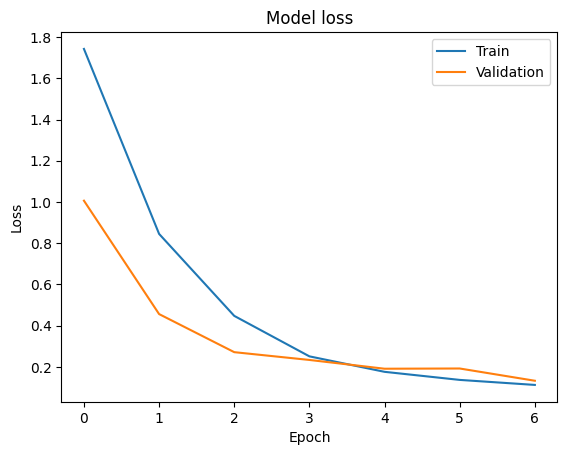

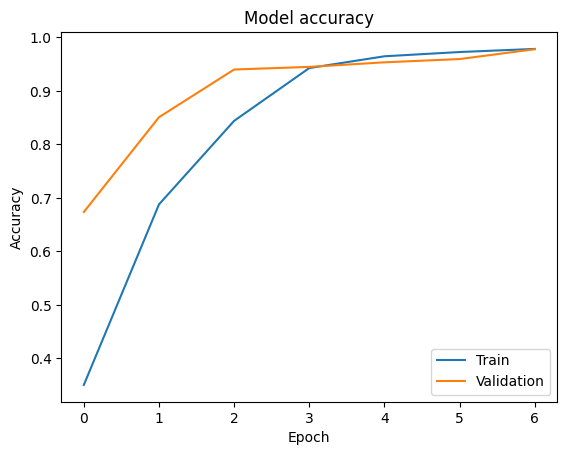

In [149]:
# plot loss
plt.plot(modelku.history['loss'])
plt.plot(modelku.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot acc
plt.plot(modelku.history['accuracy'])
plt.plot(modelku.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()